<a href="https://colab.research.google.com/github/allanbatista/aulas-machine-learning/blob/master/Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os, re, nltk
import numpy as np

# download ntlk stemmer data
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [3]:
import pandas as pd

df = pd.read_csv('results-20200124-142255.csv')
df.head()

,DEPARTAMENTO,NOME
0,12,Porta Mamadeira Lhama Azul - Momole
1,12,Bolsa Maternidade Camama Kipling Azul Golden N...
2,12,Babador Colete Impermeável Estampado -Bia Baby
3,12,MOBILE HAPPY CARNIE LUXO ELEFA. AMAR.CASA VERDE
4,12,Naninha GALINHA PINTADINHA Sonho de Luz 381


In [4]:
reg = re.compile('[^a-z]')
stemmer = nltk.stem.RSLPStemmer()

def norm_text(text):
  words = reg.sub(' ',text.lower().strip()).split()
  results = [stemmer.stem(word) for word in words if word]
  return " ".join(results)

df['NOME_NORM'] = df.NOME.apply(norm_text)
df.head()

,DEPARTAMENTO,NOME,NOME_NORM
0,12,Porta Mamadeira Lhama Azul - Momole,port mamad lham azul momol
1,12,Bolsa Maternidade Camama Kipling Azul Golden N...,bols matern camam kipling azul golden night k w
2,12,Babador Colete Impermeável Estampado -Bia Baby,bab colet imperm vel estamp bia baby
3,12,MOBILE HAPPY CARNIE LUXO ELEFA. AMAR.CASA VERDE,mobil happy carni lux elef am cas verd
4,12,Naninha GALINHA PINTADINHA Sonho de Luz 381,nan gal pint sonh de luz


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
 
tfidf = TfidfVectorizer(stop_words=stop_words)
tfidf.fit(df.NOME_NORM)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
                            'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
                            'u', 'v', 'w', 'x', 'y', 'z'],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [8]:
tfidf.vocabulary_

{'port': 4050,
 'mamad': 3114,
 'lham': 2934,
 'azul': 400,
 'momol': 3382,
 'bols': 660,
 'matern': 3189,
 'camam': 828,
 'kipling': 2798,
 'golden': 2294,
 'night': 3576,
 'bab': 403,
 'colet': 1120,
 'imperm': 2550,
 'vel': 5394,
 'estamp': 1829,
 'bia': 560,
 'baby': 407,
 'mobil': 3358,
 'happy': 2396,
 'carni': 894,
 'lux': 3057,
 'elef': 1701,
 'am': 154,
 'cas': 912,
 'verd': 5415,
 'nan': 3502,
 'gal': 2191,
 'pint': 3947,
 'sonh': 4771,
 'de': 1391,
 'luz': 3060,
 'len': 2917,
 'umedec': 5311,
 'johnson': 2714,
 'hor': 2476,
 'do': 1559,
 'son': 4768,
 'unidad': 5325,
 'carr': 899,
 'passei': 3813,
 'pol': 4016,
 'azzurr': 401,
 'burigott': 777,
 'cade': 802,
 'ref': 4298,
 'jelly': 2692,
 'safety': 4503,
 'st': 4834,
 'ber': 543,
 'til': 5095,
 'origin': 3711,
 'ros': 4459,
 'cosc': 1258,
 'tapet': 5001,
 'ativ': 339,
 'gymin': 2375,
 'developlac': 1485,
 'tiny': 5099,
 'lov': 3026,
 'beb': 518,
 'confort': 1196,
 'galzer': 2196,
 'cocoon': 1102,
 'kg': 2786,
 'grafit': 2313

In [0]:
# faz a transformação do dataset em vetor
X = tfidf.fit_transform(df.NOME_NORM).todense()

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

Y = df.DEPARTAMENTO

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

m = GaussianNB()
m.fit(X_train, y_train)
print(classification_report(y_test, m.predict(X_test)))

              precision    recall  f1-score   support

          11       0.90      0.89      0.90       319
          12       0.66      0.80      0.72       306
          13       0.81      0.76      0.78       291
          14       0.76      0.65      0.70       284

    accuracy                           0.78      1200
   macro avg       0.78      0.77      0.78      1200
weighted avg       0.78      0.78      0.78      1200



In [0]:
Avaliaçãão dos modelos

- precision
- recall
- f1-score
- matriz de confusão

Automatically created module for IPython interactive environment


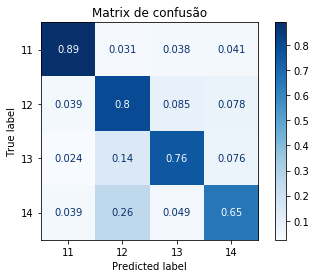

In [28]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2)


disp = plot_confusion_matrix(m, X_test, y_test,
                              display_labels=set(Y),
                              cmap=plt.cm.Blues,
                              normalize="true")

disp.ax_.set_title("Matrix de confusão")

plt.show()
